# **Principal Component Analysis in NumPy**

## **Importing required Libraries and Mounting Drive**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import drive

# mounting the drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## **Loading the Dataset**

In [4]:
# Load the data and display the first few rows

file_path = '/content/drive/My Drive/Numpy_for_Numerical_Computing_&_Data_Analysis/data/input/Housing_sample.csv'

# Load the data into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521  20141013T000000  231300.0         2       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

## **Standardization**

In [5]:
# Select the features which are more significant
features = [ 'floors','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront',  'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','zipcode',]


# Subset the data
data_subset = data[features].copy()

# Handle missing values by filling them with the mean of the column
data_subset.fillna(data_subset.mean(), inplace=True)

# Standardize the data
mean = data_subset.mean(axis=0)
std = data_subset.std(axis=0)
data_standardized = (data_subset - mean) / std

# Convert the pandas DataFrame to a numpy array
data_standardized_np = data_standardized.to_numpy()

# Convert to numpy array
# data_standardized_np = data_standardized.to_numpy()
print('\nhousing subset data shape : ',data_standardized_np.shape)


housing subset data shape :  (21613, 13)


## **Compute the Covariance Matrix**

In [6]:
# Compute the covariance matrix
cov_matrix = np.cov(data_standardized_np, rowvar=False)
cov_matrix.shape

(13, 13)

##  **Calculate Eigenvectors and Eigenvalues**

In [7]:
# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigenvectors shape:\n', eigenvectors.shape)
print('\nEigenvalues shape:\n', eigenvalues.shape)


Eigenvectors shape:
 (13, 13)

Eigenvalues shape:
 (13,)


### **Sort the eigenvalues and eigenvectors in descending order**

In [8]:
# Sort the eigenvalues and eigenvectors
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

## **Component Selection**

### **Computing an ploting the explained variance and select K Principal components**

In [9]:
import matplotlib.pyplot as plt

#exploring the explained variance by the principal components
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

#calculating the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

#finding the number of principal components that explain at least 90% of the variance
num_components_90 = np.argmax(cumulative_variance >= 0.90)
print("Number of principal components that explain at least 90% of the variance:", num_components_90)

Number of principal components that explain at least 90% of the variance: 8


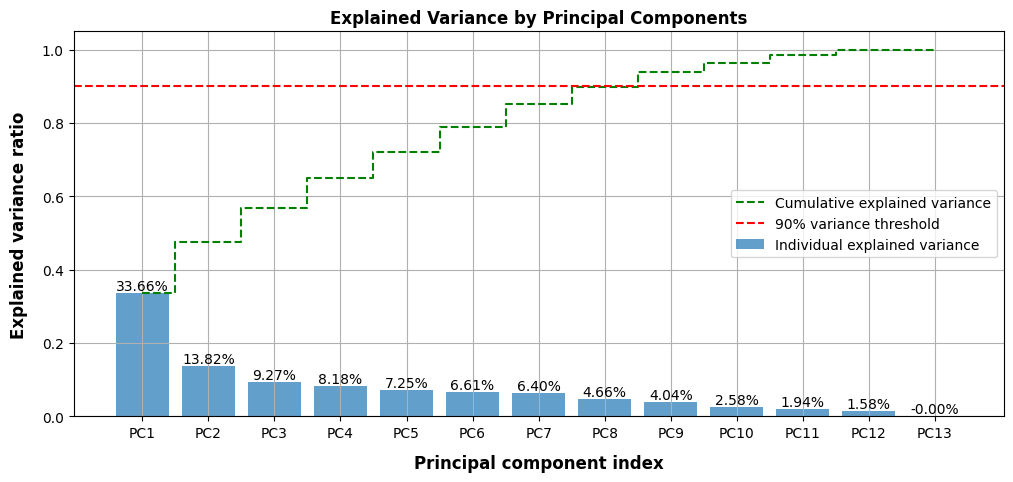

In [10]:
# Plotting explained variance by principal components
plt.figure(figsize=(12, 5))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
               label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance', color='green',linestyle='--')

plt.axhline(y=0.9, color='r', linestyle='--', label='90% variance threshold')

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{explained_variance[i]*100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(range(1, len(explained_variance) + 1),labels=[f'PC{i}' for i in range(1, len(explained_variance) + 1)])


plt.xlabel('Principal component index', fontsize=12, fontweight='bold', labelpad=10, loc='center')
plt.ylabel('Explained variance ratio', fontsize=12, fontweight='bold', labelpad=10, loc='center')
plt.legend(loc='center right')
plt.title('Explained Variance by Principal Components',fontsize=12, fontweight='bold', loc='center')
plt.grid(True)
plt.show()


### **Select the top k eigenvectors**

In [11]:
# Select the top k eigenvectors
k = 8  # For 2 principal components
eigenvectors_subset = sorted_eigenvectors[:, 0:k]
eigenvectors_subset.shape

(13, 8)

In [12]:
# analysing the coefficients (or loadings) or the weights assigned to each original feature
coeff_weights  = pd.DataFrame(eigenvectors_subset, index=features, columns=[f'PC{i+1}' for i in range(k)])
coeff_weights

PC1       PC2       PC3       PC4       PC5       PC6  \
floors         0.288862  0.343786 -0.255567  0.111168 -0.024249  0.010709   
bedrooms       0.282771 -0.285754  0.118232  0.196593  0.130129 -0.130039   
bathrooms      0.415089 -0.081167 -0.037039  0.105647  0.002405 -0.001701   
sqft_living    0.428669 -0.250661 -0.001327 -0.007448  0.018747  0.067449   
sqft_lot       0.083159 -0.035692  0.233305 -0.749575  0.222172  0.507961   
waterfront     0.040100 -0.134496 -0.365127 -0.373556 -0.805886 -0.083101   
condition     -0.106876 -0.392639  0.333578 -0.007701 -0.200972 -0.244583   
grade          0.402981 -0.024054 -0.061960 -0.000562 -0.044467  0.073675   
sqft_above     0.427830  0.034235 -0.031033 -0.100846  0.034004 -0.030555   
sqft_basement  0.089081 -0.584233  0.055311  0.173233 -0.024720  0.197143   
yr_built       0.288981  0.399633  0.155315  0.083850 -0.138173  0.019593   
yr_renovated   0.002969 -0.188331 -0.579473 -0.308131  0.468880 -0.449797   
zipcode       -0.153983 -0.137675 -0.502531  0.306846  0.015289  0.636980   

                    PC7       PC8  
floors        -0.330768 -0.071591  
bedrooms      -0.006596  0.767725  
bathrooms      0.049490 -0.131508  
sqft_living   -0.022747 -0.045091  
sqft_lot      -0.061967  0.063715  
waterfront     0.113785  0.186652  
condition     -0.643263 -0.293254  
grade         -0.088259 -0.308470  
sqft_above    -0.268521  0.110438  
sqft_basement  0.455218 -0.300211  
yr_built       0.292985 -0.189002  
yr_renovated   0.065246 -0.159794  
zipcode       -0.282480  0.050164

## **Transformation and Data Projection**

In [13]:
# Project the data onto the eigenvectors (principal components)
principal_components = np.dot(data_standardized_np, eigenvectors_subset)

# Convert to dataframe
reduced_principal_components = pd.DataFrame(principal_components,columns=[f'PC{i}' for i in range(1, k + 1)])
reduced_principal_components.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.701484  0.673891 -0.998373  0.224620 -0.023959  1.289862 -0.082740   
1  0.183023 -0.847795 -3.780432 -1.033432  2.457930 -1.432769 -0.005135   
2 -3.223519  0.872206  0.387303 -0.723404  0.072623 -0.534882  0.701426   
3 -0.645988 -2.532919  0.746059  1.063175 -0.458341  0.220240 -0.664129   
4 -0.404979  0.825902  0.168163 -0.041319 -0.055234  0.041810  0.589442   

        PC8  
0 -0.158371  
1 -0.700070  
2  0.077118  
3 -0.527965  
4 -0.023668

# **Interpolation and Curve Fitting in  NumPy**

##**np.interp()**

New x-coordinates:
 [0.         0.88888889 1.77777778 2.66666667 3.55555556 4.44444444
 5.33333333 6.22222222 7.11111111 8.        ]

Interpolated values corresponding to the new x-coordinates:
 [0.         1.33333333 2.66666667 3.66666667 4.55555556 5.44444444
 6.33333333 7.22222222 8.11111111 9.        ]


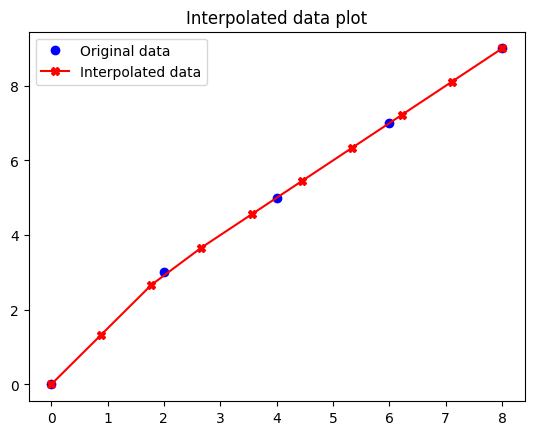

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Known data points
xp = np.array([0, 2, 4, 6, 8]) #
fp = np.array([0, 3, 5, 7, 9])

# New x-coordinates between the minimum and maximum xp values
x = np.linspace(xp.min(), xp.max(), 10)
print('New x-coordinates:\n', x)
# Interpolate the values
y = np.interp(x, xp, fp)

# Print the interpolated values
print("\nInterpolated values corresponding to the new x-coordinates:\n", y)

# Plotting the original data points and the interpolated points
plt.title('Interpolated data plot')
plt.plot(xp, fp, 'bo', label='Original data')
plt.plot(x, y, '-rX', label='Interpolated data')
plt.legend()
plt.show()

### **np.interp() eith left and right parmeters**

New x-coordinates:
 [-1  1  3  5  7  9]

Interpolated values corresponding to the new x-coordinates:
 [-1.   2.5  6.   8.  10.  11. ]


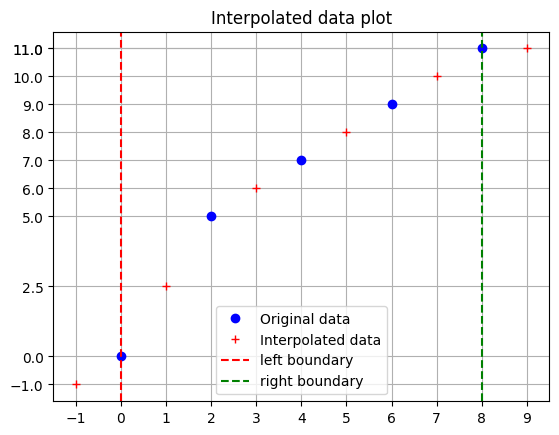

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Known data points
xp = np.array([0, 2, 4, 6, 8]) #
fp = np.array([0, 5, 7, 9, 11])

# New x-coordinates between the minimum and maximum xp values
x = np.array([-1,1, 3, 5, 7, 9])
print('New x-coordinates:\n', x)
# Interpolate the values
y = np.interp(x, xp, fp,left=-1,right=11)

# Print the interpolated values
print("\nInterpolated values corresponding to the new x-coordinates:\n", y)

# Plotting the original data points and the interpolated points
plt.title('Interpolated data plot')
plt.plot(xp, fp, 'bo', label='Original data')
plt.plot(x, y, 'r+', label='Interpolated data')
plt.axvline(x=0, color='r', linestyle='--', label='left boundary')
plt.axvline(x=8, color='g', linestyle='--', label='right boundary')
plt.xticks(np.concatenate((xp,x)))
plt.yticks(np.concatenate((fp,y)))


plt.legend(loc='best')
plt.grid(True)
plt.show()


### **Perodic interpolation**

Interpolated values with period: [ 0.5 -0.5 -0.5  0.5  0.5]


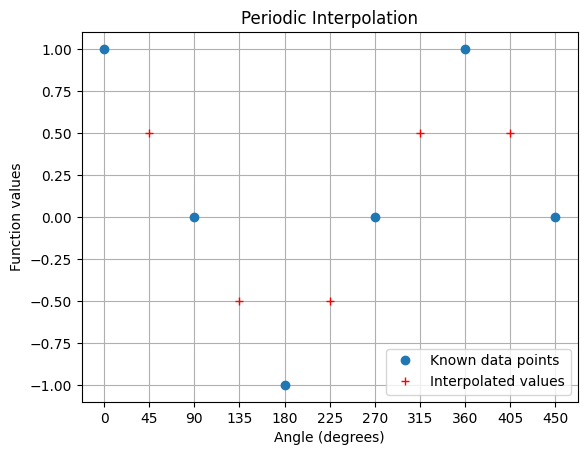

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# xp => Known data points (angles in degrees )
angles = [0, 90, 180, 270, 360, 450]  # degrees
# fp => Known data points (function values) corresponding to the xp angles
values = [1, 0, -1, 0, 1, 0]  # function values (e.g., cos function)

# x= > New angles at which to interpolate the values
new_angles = [45, 135, 225, 315, 405]  # degrees

# use np.interp() to interpolate the values at the period of 360 degrees
interpolated_values = np.interp(new_angles, angles, values, period=360)


print("Interpolated values with period:", interpolated_values)

# Plot the known data points
plt.plot(angles, values, 'o', label='Known data points')

# Plot the interpolated values
plt.plot(new_angles, interpolated_values, 'r+', label='Interpolated values')

# Add titles and labels
plt.title('Periodic Interpolation')
plt.xlabel('Angle (degrees)')
plt.ylabel('Function values')
plt.xticks((angles+new_angles))
plt.legend(loc='best')
plt.grid(True)

# Display the plot
plt.show()


## **np.polyfit()**

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 9, 16, 25])

# Fit a 2nd degree polynomial to the data
coefficients = np.polyfit(x, y, 2)

print("Coefficients of the polynomial:", coefficients)


Coefficients of the polynomial: [ 1.00000000e+00 -3.87383946e-15  7.53182222e-15]


### **np.poly1d()**

### **From Coefficients: To create a polynomial from coefficients.**

In [18]:
# construct a polynomial function x^2 - 2x + 1 from the coefficients
coeffs = [1, -2, 1]

# Create a polynomial funtion from the coefficients
p = np.poly1d(coeffs)

print('Polynomial function:', p)

#evaluate the polynomial at x = 2
y = p(2)
print('y =', y)

Polynomial function:    2
1 x - 2 x + 1
y = 1


### **From Roots: To create a polynomial from its roots.**

In [19]:
# create a polynomial function X^2 - 3X + 2 from the roots
import numpy as np
roots = [1, 2]

# Create a polynomial funtion from the roots
p = np.poly1d(roots, r=True)
print('polynomial:', p)
print('Polynomial type:', type(p))

#evaluate the polynomial at x = 2
y = p(2)
print('y =', y)

polynomial:    2
1 x - 3 x + 2
Polynomial type: <class 'numpy.poly1d'>
y = 0.0


In [20]:
import numpy as np

# Coefficients from polynomial fitting
coefficients = [1, -2, 1]

# Create a polynomial function
polynomial = np.poly1d(coefficients)

# Evaluate the polynomial at x = 3
y = polynomial(3)
print(y)


4


Polynomial:         2
0.2321 x + 1.154 x + 1.821
Coefficients of the polynomial: [0.23214286 1.15357143 1.82142857]


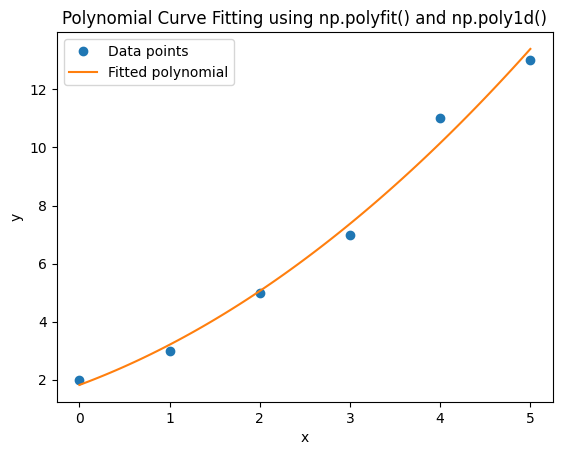

In [21]:
# curve fitting using np.polyfit() and np.poly1d()
import numpy as np
import matplotlib.pyplot as plt

# Sample data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11, 13])

# Fit a 2nd degree polynomial to the data
coefficients = np.polyfit(x, y, 2)

# Create a polynomial function from the coefficients
polynomial = np.poly1d(coefficients)
print("Polynomial:", polynomial)

# Generate x values for plotting the fitted polynomial
x_fit = np.linspace(0, 5, 100)
y_fit = polynomial(x_fit)

# Print the polynomial coefficients
print("Coefficients of the polynomial:", coefficients)

# Plot the original data points and the fitted polynomial curve
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_fit, y_fit, '-', label='Fitted polynomial')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Curve Fitting using np.polyfit() and np.poly1d()')
plt.show()


### **np.polynomial.Polynomial.fit()**

 Polynomial : 6.15625 + 5.78571429·x + 1.45089286·x²
Coefficients of the polynomial with degree 2: [1.82142857 1.15357143 0.23214286]


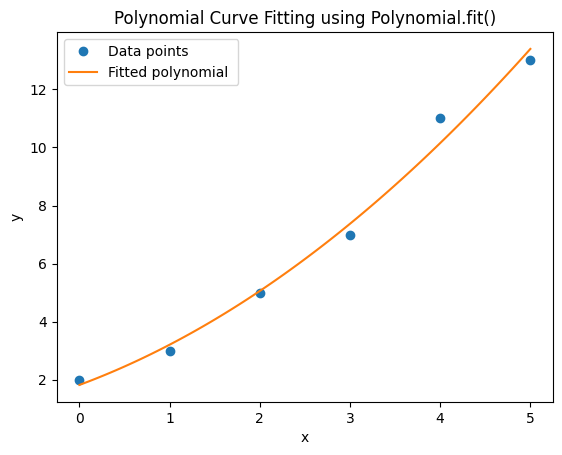

In [ ]:
# curve fitting using Polynomial.fit()
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Sample data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11, 13])

# Fit a 2nd degree polynomial to the data using Polynomial.fit
degree = 2
p = Polynomial.fit(x, y, degree)

print(" Polynomial :", p)

# Print the polynomial coefficients
coeff = p.convert().coef # Convert the polynomial to coefficients
print("Coefficients of the polynomial with degree 2:", coeff)


# Generate x values for plotting the fitted polynomial
x_fit = np.linspace(0, 5, 100)
y_fit = p(x_fit)

# Plot the original data points and the fitted polynomial curve
plt.plot(x, y, 'o', label='Data points')
plt.plot(x_fit, y_fit, '-', label=f'Fitted polynomial ')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Polynomial Curve Fitting using Polynomial.fit()')
plt.show()


# **Fourier Analysis and Signal Processing in NumPy**

## **Numpy Key Funtions for Fourier Analysis and Signal Processing**

### **np.fft.fft() and np.fft.ifft()**

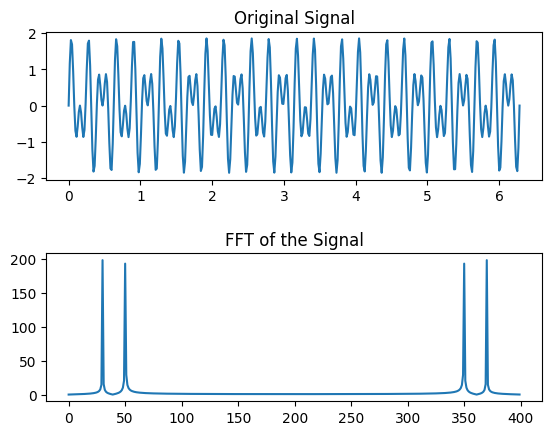

In [24]:
# Using function np.fft.fft()
import numpy as np
import matplotlib.pyplot as plt

# Sample signal: a combination of two sine waves
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(30 * x) + np.sin(50 * x)

# Compute the FFT
fft_result = np.fft.fft(y)

# Plot the original signal and its FFT
plt.subplot(2, 1, 1)
plt.plot(x, y)

plt.title("Original Signal")
plt.subplots_adjust(hspace=0.5)
plt.subplot(2, 1, 2)
plt.plot(np.abs(fft_result))

plt.title("FFT of the Signal",)
plt.show()


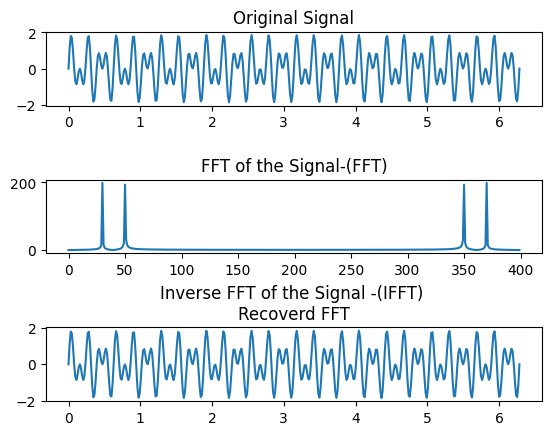

In [25]:
#numpy.fft.ifft()
import numpy as np
import matplotlib.pyplot as plt

# Sample signal: a combination of two sine waves
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(30 * x) + np.sin(50 * x)

# Compute the FFT
fft_result = np.fft.fft(y)

# Compute the inverse FFT
ifft_result = np.fft.ifft(fft_result)

# Plot the original signal and its inverse FFT
plt.subplot(3, 1, 1)
plt.plot(x, y)
plt.title("Original Signal")

plt.subplot(3, 1, 2)
plt.plot(np.abs(fft_result))
plt.title("FFT of the Signal-(FFT)",)

plt.subplot(3, 1, 3)
plt.plot(x, ifft_result.real)
plt.title("Inverse FFT of the Signal -(IFFT) \nRecoverd FFT")

plt.subplots_adjust(hspace=1)
plt.show()


### **np.fft.fft2() and np.fft.ifft2()**

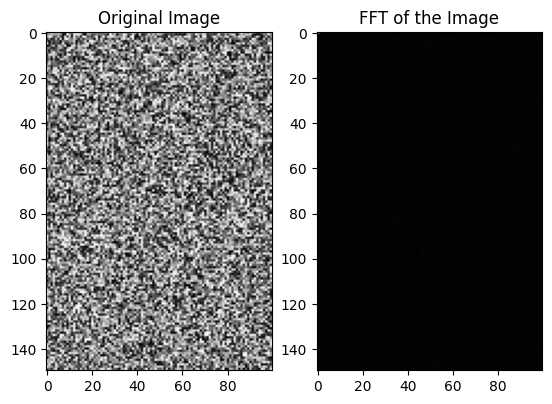

In [26]:
#np.fft.fft2()
import numpy as np
import matplotlib.pyplot as plt

# Sample 2D signal (image)
image = np.random.random((150, 100))

# Compute the 2D FFT
fft2_result = np.fft.fft2(image)

# Plot the original image and its FFT
plt.subplot(1, 2, 1)
plt.imshow(image.real, cmap='gray')
# plt.imshow(np.log(np.abs(image)), cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
# plt.imshow(np.log(np.abs(fft2_result)), cmap='gray')
plt.imshow(fft2_result.real, cmap='gray')

plt.title("FFT of the Image")

plt.show()


In [27]:
#np.fft.fftn()
import numpy as np

# Sample 3D signal
signal = np.random.random((10, 10, 10))

# Compute the N-dimensional FFT
fftn_result = np.fft.fftn(signal)

print(fftn_result)


[[[ 4.86895875e+02+0.00000000e+00j -2.41622393e+00+7.97979368e+00j
   -9.82951276e+00-2.65847134e-01j -6.63821402e+00-6.05775014e+00j
   -6.25648013e+00+9.70554645e+00j -1.89637007e+01+2.56739074e-16j
   -6.25648013e+00-9.70554645e+00j -6.63821402e+00+6.05775014e+00j
   -9.82951276e+00+2.65847134e-01j -2.41622393e+00-7.97979368e+00j]
  [-2.24436058e+00+3.31958640e+00j -6.38458690e+00+6.62127947e+00j
   -1.04955492e+01+1.68575955e+00j  8.03975410e+00-1.54315886e+01j
   -3.51242488e+00-9.95574663e+00j  1.22647395e+01+1.18470932e+01j
   -1.13191823e+00-2.86333946e+00j -2.54398527e+00+2.45036359e+00j
   -5.74516759e+00+4.08759015e-01j -1.14542083e+01-4.76160782e+00j]
  [ 2.52445317e+00+8.07563202e+00j  8.08629019e+00+4.27773577e+00j
    1.67303579e+00+4.89495527e+00j -9.74183427e+00+4.20855086e+00j
   -1.02851944e+01+2.21592978e+00j -1.41771319e+00+1.47921776e+00j
    3.22172542e+00+1.29005519e+00j  3.79288722e+00-2.34359364e+00j
    2.40616333e+00-4.05671738e+00j  1.57901056e+00-6.0132741

In [28]:
#np.fft.ifftn()
import numpy as np

# Sample 3D signal
signal = np.random.random((10, 10, 10))

# Compute the N-dimensional FFT
fftn_result = np.fft.fftn(signal)

# Compute the inverse N-dimensional FFT
ifftn_result = np.fft.ifftn(fftn_result)

print(ifftn_result)


[[[9.07949473e-01+6.85389245e-17j 2.87446963e-01-2.79047618e-17j
   5.92600743e-01+1.95075402e-19j 3.46219176e-01+3.32492956e-17j
   2.42008613e-01-1.58087807e-17j 3.47161788e-01-2.69854899e-17j
   8.88625735e-01+2.45077258e-17j 4.46456060e-01+2.11669377e-17j
   9.52745039e-01-1.61798591e-17j 8.28425515e-01+4.91330119e-17j]
  [3.17078129e-01+1.90229776e-17j 5.56228019e-01+1.07708981e-16j
   4.61328258e-01+6.22776372e-17j 3.16477913e-01-2.02085928e-17j
   1.20976327e-01+5.02215443e-17j 3.80187805e-01+5.71102738e-17j
   5.52184710e-01+3.02717081e-17j 1.28434425e-01+6.10459635e-17j
   9.67764474e-01-3.50376228e-17j 1.25375470e-01+3.70715129e-18j]
  [5.48752906e-01-3.09452879e-17j 5.93513698e-01+2.52969245e-17j
   5.84731476e-01+3.17394610e-17j 8.91093617e-01-4.41201721e-18j
   2.21487285e-01+3.12235417e-17j 9.00619324e-01+4.74364739e-17j
   7.59919386e-02+4.42752778e-17j 2.36239346e-01-6.58758017e-17j
   3.87298768e-02-1.45069295e-17j 7.16797695e-01+3.89707794e-18j]
  [7.54093367e-01+1.53

### **numpy.fft.rfft() and numpy.fft.irfft()**

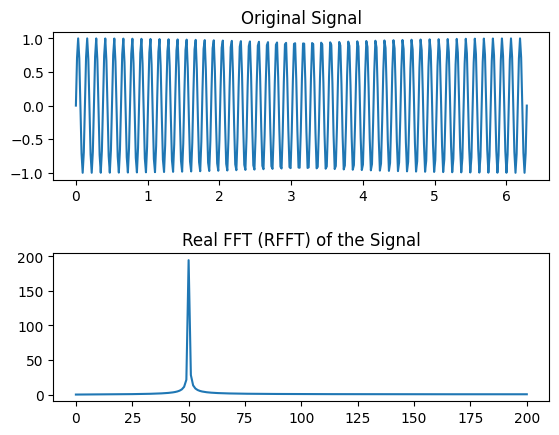

In [29]:
#numpy.fft.rfft()
import numpy as np
import matplotlib.pyplot as plt

# Sample real-valued signal
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(50 * x)

# Compute the real FFT
rfft_result = np.fft.rfft(y)

# Plot the original signal and its real FFT
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.title("Original Signal")

plt.subplot(2, 1, 2)
plt.plot(np.abs(rfft_result))
plt.title("Real FFT (RFFT) of the Signal")
plt.subplots_adjust(hspace=.5)
plt.show()


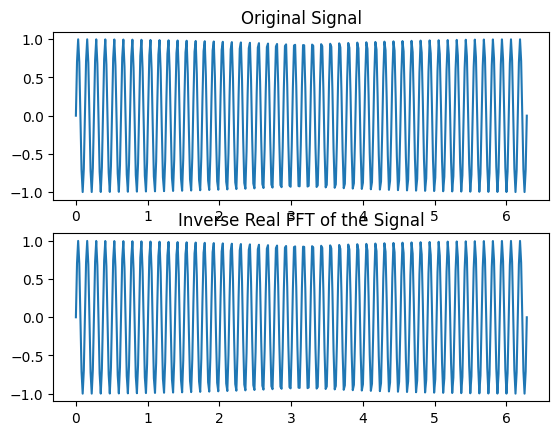

In [30]:
#np.fft.irfft()
import numpy as np
import matplotlib.pyplot as plt

# Sample real-valued signal
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(50 * x)

# Compute the real FFT
rfft_result = np.fft.rfft(y)

# Compute the inverse real FFT
irfft_result = np.fft.irfft(rfft_result)

# Plot the original signal and its inverse real FFT
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.title("Original Signal")

plt.subplot(2, 1, 2)
plt.plot(x, irfft_result)
plt.title("Inverse Real FFT of the Signal")
plt.show()


### **np.fft.fftshift() and np.fft.ifftshift()**

In [31]:
#numpy.fft.fftshift()
import numpy as np

# Create a frequency array using np.fft.fftfreq and reshape it to a 3x3 matrix
freqs = np.fft.fftfreq(9, d=1./18).reshape(3, 3)
print("Original Frequency Array:")
print(freqs)

# Apply fftshift to the frequency array along the specified axis
shifted_freqs = np.fft.fftshift(freqs, axes=(1,))
print("\nShifted Frequency Array using fftshift:")
print(shifted_freqs)




Original Frequency Array:
[[ 0.  2.  4.]
 [ 6.  8. -8.]
 [-6. -4. -2.]]

Shifted Frequency Array using fftshift:
[[ 4.  0.  2.]
 [-8.  6.  8.]
 [-2. -6. -4.]]


In [32]:
#numpy.fft.ifftshift()
import numpy as np

# Create a frequency array using np.fft.fftfreq and reshape it to a 3x3 matrix
freqs = np.fft.fftfreq(9, d=1./18).reshape(3, 3)
print("Original Frequency Array:")
print(freqs)

# Apply fftshift to the frequency array along the specified axis
shifted_freqs = np.fft.fftshift(freqs, axes=(1,))
print("\nShifted Frequency Array using fftshift:")
print(shifted_freqs)

# Apply ifftshift to the previously shifted frequency array along the same axis
unshifted_freqs = np.fft.ifftshift(shifted_freqs, axes=(1,))
print("\nUnshifted Frequency Array using ifftshift:")
print(unshifted_freqs)


Original Frequency Array:
[[ 0.  2.  4.]
 [ 6.  8. -8.]
 [-6. -4. -2.]]

Shifted Frequency Array using fftshift:
[[ 4.  0.  2.]
 [-8.  6.  8.]
 [-2. -6. -4.]]

Unshifted Frequency Array using ifftshift:
[[ 0.  2.  4.]
 [ 6.  8. -8.]
 [-6. -4. -2.]]


### **np.fft.fftfreq(n, d=1.0)**

In [33]:
# Example1
import numpy as np

# Number of sample points
N = 400
# Sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

# Compute the FFT
yf = np.fft.fft(y)
xf = np.fft.fftfreq(N, T)[:N//2]

print(xf)


[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248. 250.
 252. 254. 256. 258. 260. 262. 264. 266. 268. 270. 272. 274. 276. 278.
 280. 282. 284. 286. 288. 290. 292. 294. 296. 298. 300. 302. 304. 306.
 308. 310. 312. 314. 316. 318. 320. 322. 324. 326. 328. 330. 332. 334.
 336. 338. 340. 342. 344. 346. 348. 350. 352. 354. 356. 358. 360. 362.
 364. 366. 368. 370. 372. 374. 376. 378. 380. 382. 384. 386. 388. 390.
 392. 

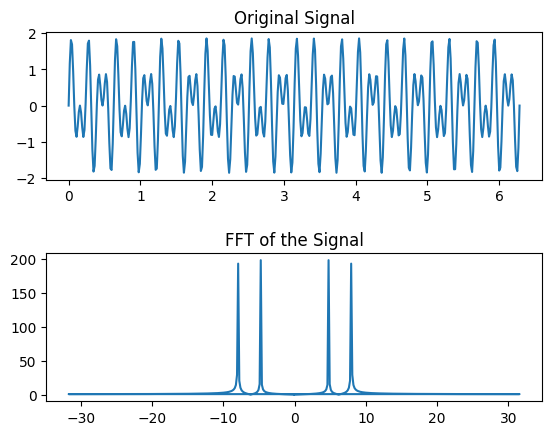

In [34]:
# Example#2
import numpy as np
import matplotlib.pyplot as plt

# Sample signal: a combination of two sine waves
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(30 * x) + np.sin(50 * x)

# Compute the FFT
fft_result = np.fft.fft(y)

# Compute the sample frequencies
sample_spacing = x[1] - x[0]
frequencies = np.fft.fftfreq(len(y), d=sample_spacing)

# Plot the original signal and its FFT
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.title("Original Signal")

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title("FFT of the Signal")
plt.subplots_adjust(hspace=0.5)
plt.show()


In [35]:
# numpy.fft.rfftfreq()
import numpy as np

# Number of sample points
N = 400
# Sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x)

# Compute the real FFT
yf = np.fft.rfft(y)
xf = np.fft.rfftfreq(N, T)

print(xf)


[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248. 250.
 252. 254. 256. 258. 260. 262. 264. 266. 268. 270. 272. 274. 276. 278.
 280. 282. 284. 286. 288. 290. 292. 294. 296. 298. 300. 302. 304. 306.
 308. 310. 312. 314. 316. 318. 320. 322. 324. 326. 328. 330. 332. 334.
 336. 338. 340. 342. 344. 346. 348. 350. 352. 354. 356. 358. 360. 362.
 364. 366. 368. 370. 372. 374. 376. 378. 380. 382. 384. 386. 388. 390.
 392. 

###  **np.fft.hfft(a, n=None, axis=-1, norm=None, out=None)**

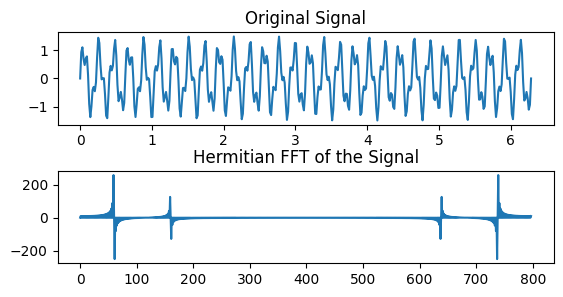

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Create a signal with Hermitian symmetry
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(30 * x) + 0.5 * np.sin(80 * x)

# Compute the Hermitian FFT
hfft_result = np.fft.hfft(y)

# Plot the original signal and its inverse Hermitian FFT
plt.subplot(3, 1, 1)
plt.plot(x, y)
plt.title("Original Signal")

plt.subplot(3, 1, 2)
plt.plot(hfft_result)
plt.title("Hermitian FFT of the Signal")


plt.subplots_adjust(hspace=0.5)
plt.show()


#### **np.fft.hfft() and np.fft.ihfft()**

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


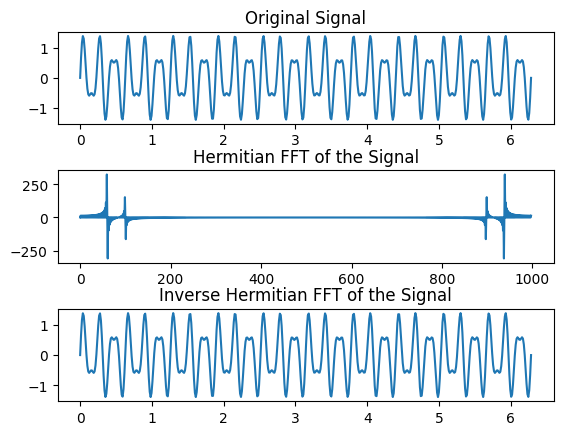

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Create a signal with Hermitian symmetry
x = np.linspace(0, 2 * np.pi, 500)
y = np.sin(30 * x) + 0.5 * np.sin(50 * x)

# Compute the Hermitian FFT
hfft_result = np.fft.hfft(y)

# Compute the inverse Hermitian FFT
ihfft_result = np.fft.ihfft(hfft_result)

# Plot the original signal and its inverse Hermitian FFT
plt.subplot(3, 1, 1)
plt.plot(x, y)
plt.title("Original Signal")

plt.subplot(3, 1, 2)
plt.plot(hfft_result)
plt.title("Hermitian FFT of the Signal")

plt.subplot(3, 1, 3)
plt.plot(x, ihfft_result)
plt.title("Inverse Hermitian FFT of the Signal")

plt.subplots_adjust(hspace=0.5)
plt.show()


## **Step by Step hands-on Example : Audio (Sound Signal) Analysis in NumPy**

###  **Step 1: Load the audio file**

In [39]:
import numpy as np
import scipy.io.wavfile as wav
from google.colab import drive
import matplotlib.pyplot as plt

# mounting the drive
drive.mount("/content/drive", force_remount=True)
# Load the audio file
input_audio = '/content/drive/My Drive/Numpy_for_Numerical_Computing_&_Data_Analysis/data/input/SampleAudio.wav'
# Read the audio file
sample_rate, audio_data = wav.read(input_audio)

Mounted at /content/drive


### **Step 2: Apply FFT to the audio signal**

(0.0, 24000.0)

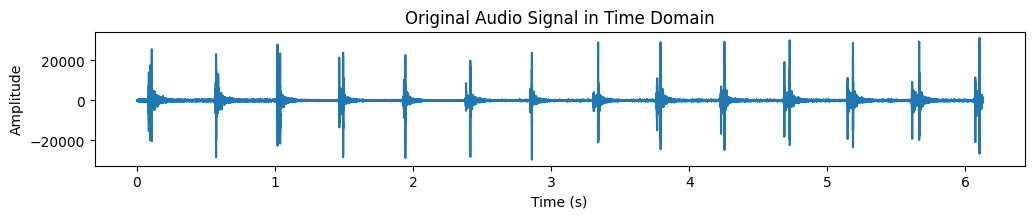

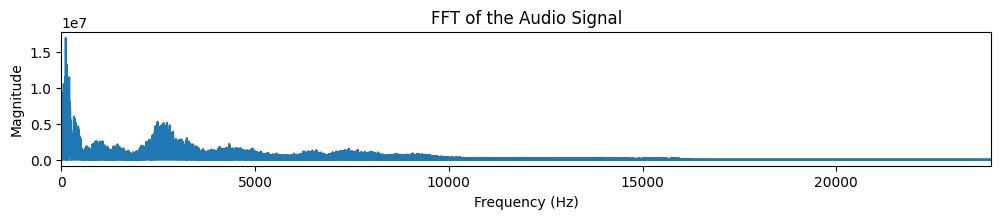

In [40]:
audio_fft = np.fft.fft(audio_data)
frequencies = np.fft.fftfreq(len(audio_data), 1/sample_rate)

# Plot the original audio signal in the time domain
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
time_axis = np.arange(len(audio_data)) / sample_rate
plt.plot(time_axis, audio_data)
plt.title('Original Audio Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the magnitude of the FFT before filtering
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 2)
plt.plot(frequencies, np.abs(audio_fft))
plt.title('FFT of the Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, sample_rate // 2)



### **Step 3: Defining a frequency band pass filter**

In [41]:
low_cutoff = 3000
high_cutoff = 5000

# Create a band-pass filter mask
filter_mask = (np.abs(frequencies) >= low_cutoff) & (np.abs(frequencies) <= high_cutoff)

### **Step 4: Apply the filter to the FFT result**

(0.0, 24000.0)

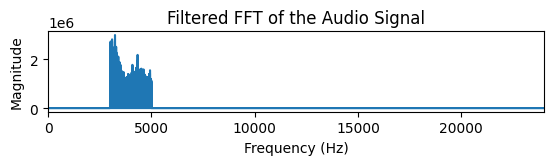

In [42]:
filtered_fft = np.copy(audio_fft)
filtered_fft[~filter_mask] = 0

# Plot the magnitude of the FFT after filtering

plt.subplot(4, 1, 3)
plt.plot(frequencies, np.abs(filtered_fft))
plt.title('Filtered FFT of the Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, sample_rate // 2)

### **Step 5: Apply the inverse FFT to recreate the filtered audio**

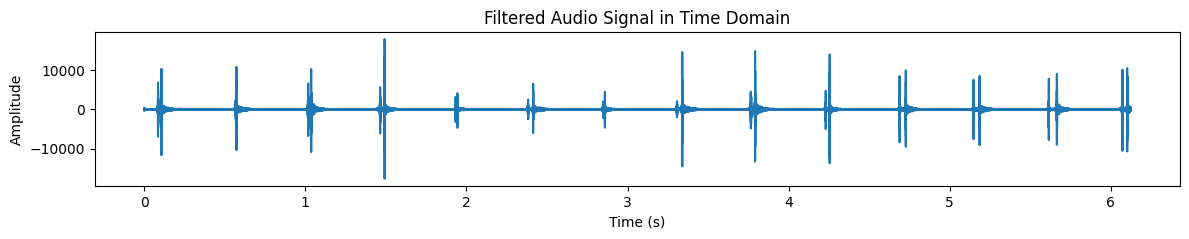

In [43]:
filtered_audio_data = np.fft.ifft(filtered_fft).real.astype(np.int16)

# Plot the filtered audio signal in the time domain
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 4)
plt.plot(time_axis, filtered_audio_data)
plt.title('Filtered Audio Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### **Step 6: Save the filtered output audio**

In [45]:
output_audio = '/content/drive/My Drive/Numpy_for_Numerical_Computing_&_Data_Analysis/data/output/filtered_audio.wav'
wav.write(output_audio, sample_rate, filtered_audio_data)

print("Audio processing complete. Filtered audio saved as 'filtered_audio.wav'.")

Audio processing complete. Filtered audio saved as 'filtered_audio.wav'.


### **step 7: playing both the original and filtered audio for comparison**

In [46]:
from IPython.display import Audio
# input Audio before FFT transformation
print("Orginal Input audio :\n")
orginal = Audio(input_audio)
display(orginal)

print("\nTransformed (Filtered) Output audio:\n")
transformed= Audio(output_audio)
display(transformed)

Orginal Input audio :




Transformed (Filtered) Output audio:



# **Image Processing with NumPy**

### **Reading and Displaying Images**

Mounted at /content/drive
type of img:  <class 'numpy.ndarray'>
Image shape:  (2221, 2130, 4)
Image data type:  float32
Image size:  18922920
Image dimensions:  3


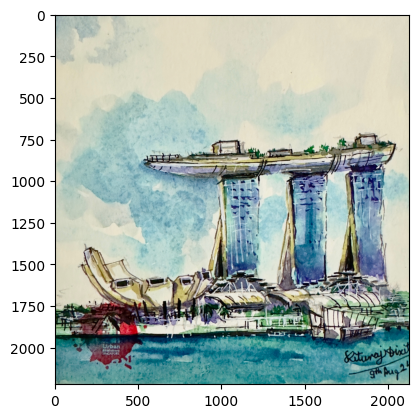

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from google.colab import drive

# mounting the drive
drive.mount("/content/drive", force_remount=True)
#Read an image
input_image = '/content/drive/My Drive/Numpy_for_Numerical_Computing_&_Data_Analysis/data/input/input_img.png'
img = imread(input_image)

print("type of img: ",type(img))
print("Image shape: ", img.shape)
print("Image data type: ", img.dtype)
print("Image size: ", img.size)
print("Image dimensions: ", img.ndim)


#display the image
plt.imshow(img)
plt.show()


### **Converting to Grayscale**

Mounted at /content/drive


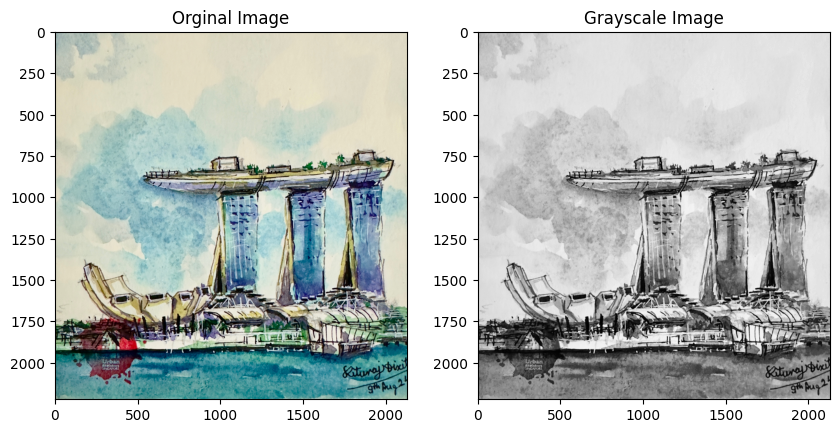

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from google.colab import drive

# mounting the drive
drive.mount("/content/drive", force_remount=True)
#Read an image
input_image = '/content/drive/My Drive/Numpy_for_Numerical_Computing_&_Data_Analysis/data/input/input_img.png'
image = imread(input_image)


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray_img = rgb2gray(img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Orginal Image')


plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.show()

### **Image Slicing**

Mounted at /content/drive


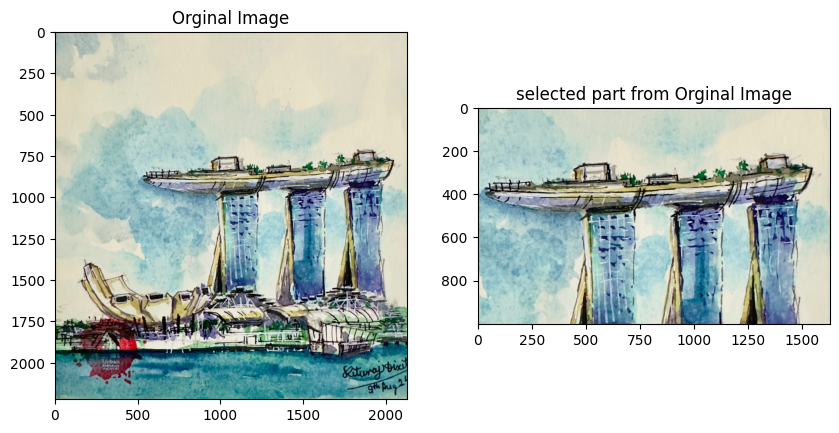

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from google.colab import drive

# mounting the drive
drive.mount("/content/drive", force_remount=True)
#Read an image
input_image = '/content/drive/My Drive/Numpy_for_Numerical_Computing_&_Data_Analysis/data/input/input_img.png'
img = imread(input_image)

# Define the region of interest (ROI)
roi = img[500:1500, 500:]

# Display the original image and the ROI
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Orginal Image')


plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('selected part from Orginal Image')
# plt.axis('off')
plt.show()

### **Image Flipping**

Mounted at /content/drive


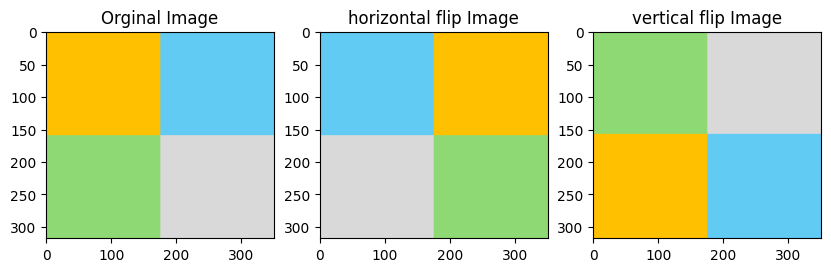

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from google.colab import drive

# mounting the drive
drive.mount("/content/drive", force_remount=True)
#Read an image
input_image = '/content/drive/My Drive/Numpy_for_Numerical_Computing_&_Data_Analysis/data/input/image_block.png'
img = imread(input_image)

#Horizontal flip
h_flip = np.fliplr(img)

#  Vertical flip
v_flip = np.flipud(img)


# Display the original image and the flipped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Orginal Image')

plt.subplot(1, 3, 2)
plt.imshow(h_flip, cmap='gray')
plt.title('horizontal flip Image')

plt.subplot(1, 3, 3)
plt.imshow(v_flip, cmap='gray')
plt.title('vertical flip Image')
plt.show()

### **Image Rotating**

Mounted at /content/drive


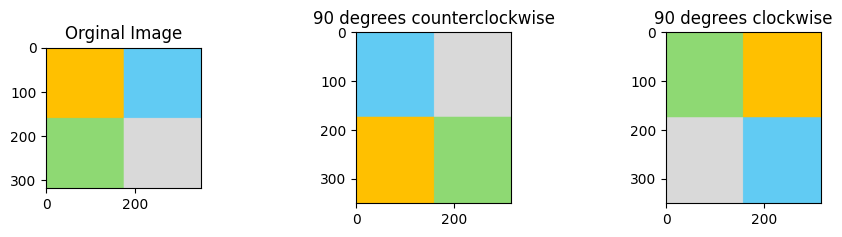

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from google.colab import drive

# mounting the drive
drive.mount("/content/drive", force_remount=True)
#Read an image
input_image = '/content/drive/My Drive/Numpy_for_Numerical_Computing_&_Data_Analysis/data/input/image_block.png'
img = imread(input_image)

#Rotate the image by 90 degrees counterclockwise
rotated_img1 = np.rot90(img)

# Rotate the image by 90 degrees clockwise
rotated_img2 = np.rot90(img, k=3)

# Display the original image and rotated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Orginal Image')

plt.subplot(1, 3, 2)
plt.imshow(rotated_img1, cmap='gray')
plt.title('90 degrees counterclockwise')

plt.subplot(1, 3, 3)
plt.imshow(rotated_img2, cmap='gray')
plt.title('90 degrees clockwise')

plt.subplots_adjust(wspace=1)
plt.show()


### **Adding Noise and Blurring Effects to Images**

Mounted at /content/drive


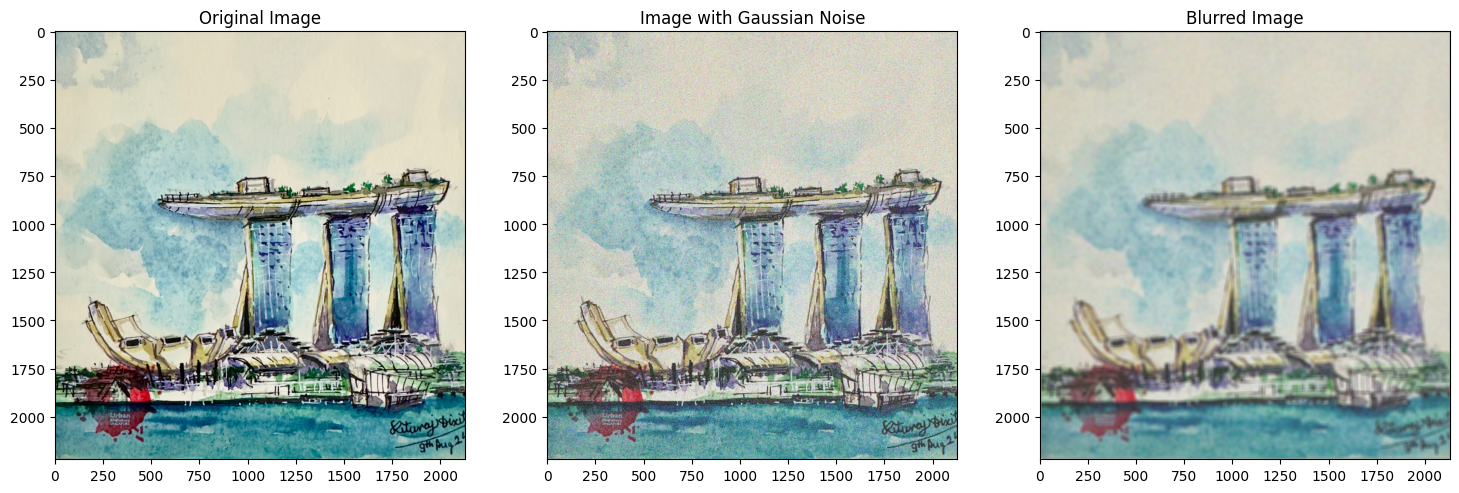

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from google.colab import drive

# Step 1: Load the Image
drive.mount("/content/drive", force_remount=True)
# Reading the image
input_image = '/content/drive/My Drive/Numpy_for_Numerical_Computing_&_Data_Analysis/data/input/input_img.png'
image = imread(input_image)

# Step 2: Apply Gaussian Noise to the Image
# Convert image to the appropriate type for manipulation
image = image * 255
image = image.astype(np.float32)

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, std=50):
    gaussian_noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image_clipped = np.clip(noisy_image, 0, 255)
    return noisy_image_clipped

# Apply Gaussian noise to the image
noisy_image = add_gaussian_noise(image, std=70)

# Step 3: Apply Blurring to the Image
kernel_size = 22
kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)

# Get the dimensions of the image
image_height, image_width, num_channels = image.shape

# Create an empty array to store the blurred image
blurred_image = np.zeros_like(noisy_image)

# Apply blurring to each channel separately
for c in range(num_channels):
    # Padding the image to handle the borders for each channel
    padded_channel = np.pad(noisy_image[:, :, c], pad_width=((kernel_size // 2, kernel_size // 2)),
                            mode='constant', constant_values=0)

    # Convolution operation for each channel
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest for the current channel
            region = padded_channel[i:i + kernel_size, j:j + kernel_size]
            # Perform element-wise multiplication and sum the result
            blurred_image[i, j, c] = np.sum(region * kernel)

# Step 4: Display the Results
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image.astype(np.uint8))

plt.subplot(1, 3, 2)
plt.title("Image with Gaussian Noise")
plt.imshow(noisy_image.astype(np.uint8))

plt.subplot(1, 3, 3)
plt.title("Blurred Image")
plt.imshow(blurred_image.astype(np.uint8))
plt.show()


### **Edge Detection**

Mounted at /content/drive


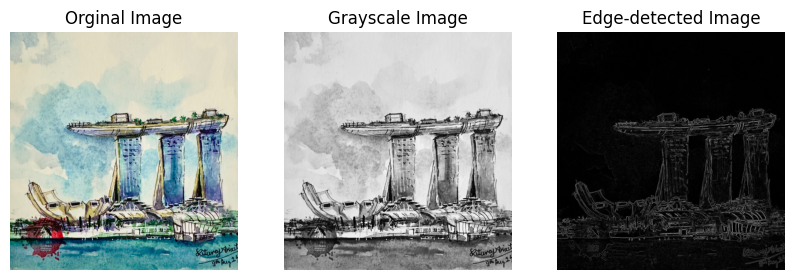

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from google.colab import drive

# mounting the drive
drive.mount("/content/drive", force_remount=True)
#Read an image
input_image = '/content/drive/My Drive/Numpy_for_Numerical_Computing_&_Data_Analysis/data/input/input_img.png'
image = imread(input_image)

# Convert the image to grayscale (simple average across RGB channels)
grayscale_image = np.mean(image[:, :, :3], axis=2)

# Sobel operator kernels for detecting edges
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Get the dimensions of the grayscale image
image_height, image_width = grayscale_image.shape

# Create empty arrays to store the gradients
grad_x = np.zeros_like(grayscale_image)
grad_y = np.zeros_like(grayscale_image)

# Apply the Sobel filter to detect edges
# Convolution with Sobel kernels
for i in range(1, image_height - 1):
    for j in range(1, image_width - 1):
        region = grayscale_image[i - 1:i + 2, j - 1:j + 2]
        grad_x[i, j] = np.sum(region * sobel_x)
        grad_y[i, j] = np.sum(region * sobel_y)

# Calculate the gradient magnitude
edge_img = np.sqrt(grad_x**2 + grad_y**2)
edge_img = (edge_img / edge_img.max()) * 255  # Normalize to range 0-255
edge_img = edge_img.astype(np.uint8)

# Display the original grayscale image and edge-detected image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Orginal Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edge_img, cmap='gray')
plt.title('Edge-detected Image')
plt.axis('off')
plt.show()
